In [56]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/media/beans/ssd/bespoke')

from constants import *
from imports import *
from viz_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Seq from real

In [57]:
sorted(glob.glob("/media/beans/ssd/bespoke_logging/*"))

['/media/beans/ssd/bespoke_logging/run_173',
 '/media/beans/ssd/bespoke_logging/run_174',
 '/media/beans/ssd/bespoke_logging/run_175',
 '/media/beans/ssd/bespoke_logging/run_176',
 '/media/beans/ssd/bespoke_logging/run_176a',
 '/media/beans/ssd/bespoke_logging/run_176b',
 '/media/beans/ssd/bespoke_logging/run_176c',
 '/media/beans/ssd/bespoke_logging/run_176d',
 '/media/beans/ssd/bespoke_logging/run_176e',
 '/media/beans/ssd/bespoke_logging/run_176f',
 '/media/beans/ssd/bespoke_logging/run_176g',
 '/media/beans/ssd/bespoke_logging/run_177',
 '/media/beans/ssd/bespoke_logging/run_178',
 '/media/beans/ssd/bespoke_logging/run_178a',
 '/media/beans/ssd/bespoke_logging/run_178b',
 '/media/beans/ssd/bespoke_logging/run_179',
 '/media/beans/ssd/bespoke_logging/run_179a',
 '/media/beans/ssd/bespoke_logging/run_180',
 '/media/beans/ssd/bespoke_logging/run_181',
 '/media/beans/ssd/bespoke_logging/run_182',
 '/media/beans/ssd/bespoke_logging/run_183',
 '/media/beans/ssd/bespoke_logging/run_184',


In [58]:
#run_id = "run_286" # back on abq # a and b created from this, abq then sabq. Oscillaty
#run_id = "run_293" # back abq, cloudy
#run_id = "run_302" # back abq, rainy
run_id = "run_313a" # gravel, briar mck

run_path = f"/media/beans/ssd/bespoke_logging/{run_id}"
model_stem = "6.10_avg"

In [59]:
aux = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/aux/*"))]).astype(np.float16)
img = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/img/*"))]).astype(np.uint8)
car_state = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/car_state/*"))]).astype(np.float16)

steer_angle = np.radians(car_state[:,0] / (STEER_RATIO)) #*-1  
tire_angle_rad = steer_angle *-1
img.shape

(19000, 100, 640, 3)

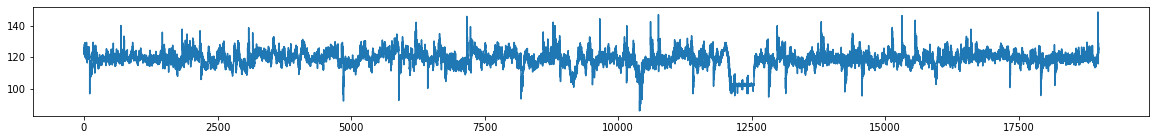

In [60]:
# seeing if cam is too slow, ie if we ever have repeated imgs

diffs = []
for i in range(len(img)-1):
    diff = (img[i] - img[i+1]).mean()
    diffs.append(diff)
    
# whether or not image is same as prev img, ie cam is slow. We just don't want to see zeros
plt.figure(figsize=(20,2))
plt.plot(diffs)

(array([4.6690e+03, 1.0924e+04, 0.0000e+00, 2.6210e+03, 5.9300e+02,
        0.0000e+00, 1.3300e+02, 1.7000e+01, 0.0000e+00, 9.0000e+00,
        1.2000e+01, 0.0000e+00, 1.4000e+01, 4.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([16.  , 16.66, 17.3 , 17.95, 18.6 , 19.25, 19.9 , 20.55, 21.2 ,
        21.84, 22.5 , 23.16, 23.8 , 24.45, 25.1 , 25.75, 26.4 , 27.05,
        27.7 , 28.34, 29.  ], dtype=float16),
 <BarContainer object of 20 artists>)

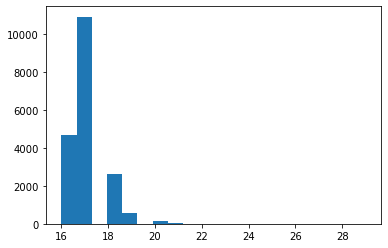

In [61]:
# timespan btwn start to get img, and publish plan, ie the timespan WE have control over
# img staleness
plt.hist(car_state[:,2], bins=20)

In [62]:
b,e = 0, -1
img = img[b:e]
aux = aux[b:e]
car_state = car_state[b:e]
steer_angle = steer_angle[b:e]
img.shape, aux.shape, car_state.shape, steer_angle.shape, #pred.shape

((18999, 100, 640, 3), (18999, 5), (18999, 7), (18999,))

(array([  55.,  169.,  396., 2532., 8849., 4853., 1577.,  431.,  101.,
          36.]),
 array([-4070. , -3206. , -2344. , -1480. ,  -616.5,   247. ,  1110. ,
         1974. ,  2838. ,  3700. ,  4564. ], dtype=float16),
 <BarContainer object of 10 artists>)

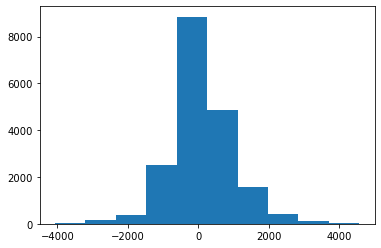

In [63]:
torque = np.degrees(steer_angle) * (aux[:,2]**2)
plt.hist(torque)

(array([1.0000e+01, 6.5000e+01, 3.5300e+02, 1.0904e+04, 7.2280e+03,
        3.8300e+02, 4.2000e+01, 4.0000e+00, 2.0000e+00, 7.0000e+00]),
 array([-222.1  , -166.1  , -110.1  ,  -54.1  ,    1.925,   57.94 ,
         113.94 ,  170.   ,  226.   ,  282.   ,  338.   ], dtype=float16),
 <BarContainer object of 10 artists>)

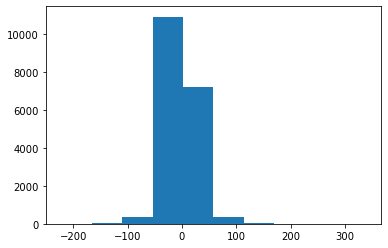

In [64]:
plt.hist(torque[1:]-torque[:-1])

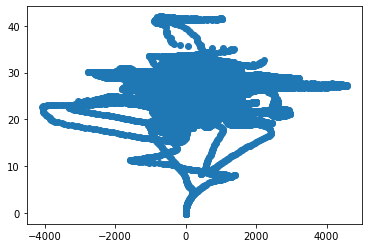

In [65]:
plt.scatter(torque, aux[:,2])

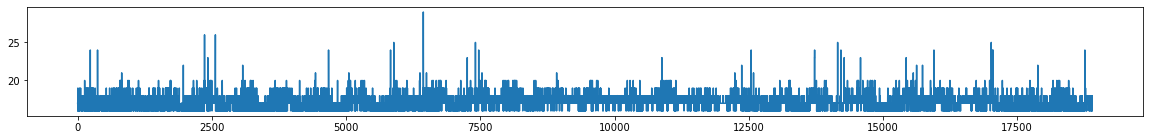

In [66]:
# img staleness
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,2])

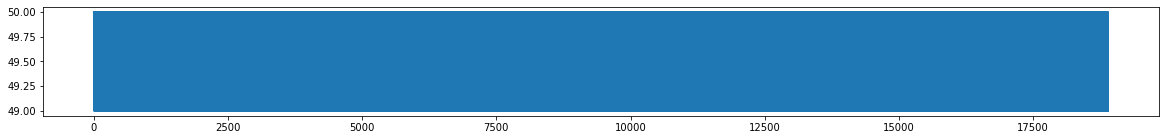

In [67]:
# loop duration
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,3])

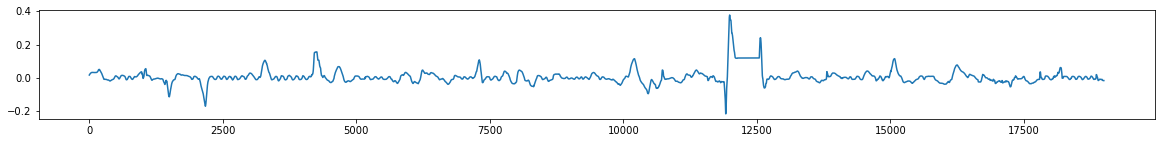

In [68]:
# steer angle
plt.figure(figsize=(20,2))
plt.plot(steer_angle)

(array([   31.,    90.,   602., 14651.,  2611.,   795.,   100.,    49.,
           29.,    41.]),
 array([-0.2158 , -0.1565 , -0.0973 , -0.038  ,  0.02129,  0.08057,
         0.1399 ,  0.1991 ,  0.2583 ,  0.3176 ,  0.377  ], dtype=float16),
 <BarContainer object of 10 artists>)

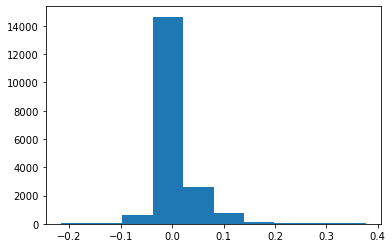

In [69]:
plt.hist(steer_angle)

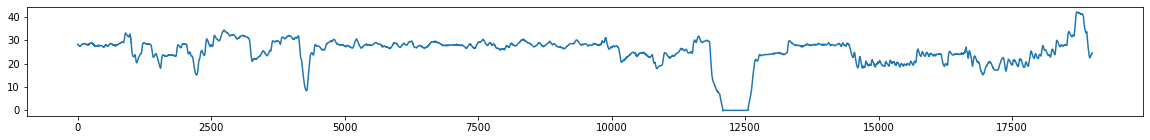

In [70]:
# speed
plt.figure(figsize=(20,2))
plt.plot(aux[:,2])

(array([ 533.,  107.,  168.,  205., 2244., 4600., 8599., 2267.,  116.,
         160.]),
 array([-0.2134,  4.016 ,  8.24  , 12.47  , 16.7   , 20.92  , 25.16  ,
        29.38  , 33.6   , 37.84  , 42.06  ], dtype=float16),
 <BarContainer object of 10 artists>)

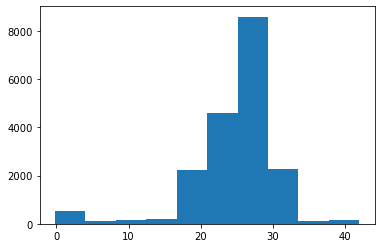

In [71]:
# speed
plt.hist(aux[:,2])

In [72]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=aux[:, 2], y=abs(steer_angle), width=600, height=600)
fig.update_xaxes(range=[0, 40])
#fig.update_yaxes(range=[0, .05])
fig.show()

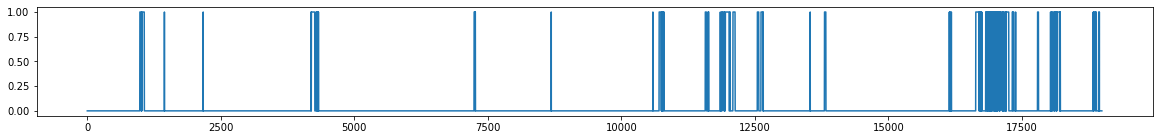

In [73]:
# steeringWheelPressed
plt.figure(figsize=(20,2))
plt.plot(car_state[:,4])

(array([   44221.,  1012789.,  5843408., 11867706., 15402351., 11431468.,
        11187410.,  3633016.,   124195.,   253436.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

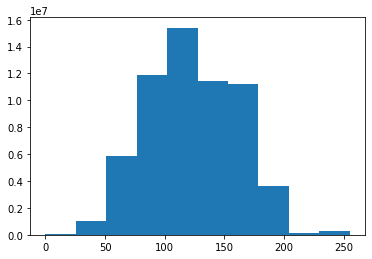

In [74]:
plt.hist(img[::20,:,:,2].flatten())

In [75]:
img.mean()

146.5438077960792

In [76]:
from input_prep import *

In [77]:
preds, obsnet_outs, cnn_activations, cnn_grads, rnn_activations, rnn_grads = get_viz_rollout(model_stem, img, aux)

In [78]:
preds_all = preds
preds_all = np.expand_dims(preds_all,0) * TARGET_NORM.cpu().numpy()
preds_all = preds_all[0]
preds_all.shape

(18999, 22)

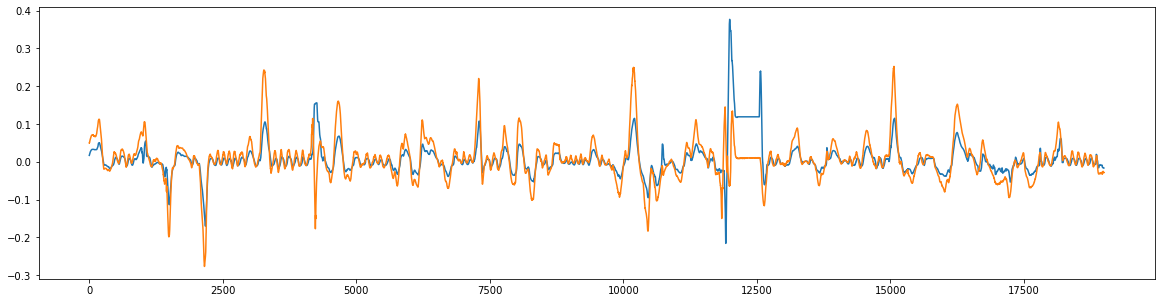

In [79]:
b, e = 0, -1
plt.figure(figsize=(20,5))
plt.plot(steer_angle[b:e])
#plt.plot(preds_all[b:e, :3]*-1)
plt.plot(preds_all[b:e, 6]*-1)

In [80]:
from traj_utils import *
from model_wrapper import LaggedLateralCalculator

In [81]:
speeds = aux[:,2]
wp_angles = gather_preds(preds_all, speeds)

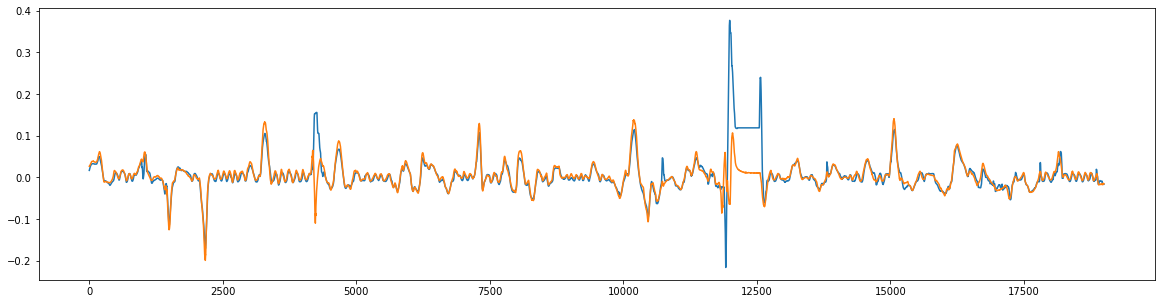

In [82]:
b, e = 0, -1
plt.figure(figsize=(20,5))
plt.plot(steer_angle[b:e])
plt.plot(np.array(wp_angles[b:e]*-1)) 

In [83]:
np.mean((steer_angle - wp_angles*-1)**2)

0.0011387788831031395

In [84]:
from train_utils import *

WHEELBASE = CRV_WHEELBASE

In [85]:
speeds_mps = kph_to_mps(aux[:,2])
trajs = torch.FloatTensor(preds_all[:,:N_WPS_TO_USE]).to('cuda')
traj_xs, traj_ys = get_trajs_world_space(trajs, speeds_mps, tire_angle_rad, WHEELBASE)
traj_xs.shape

torch.Size([18999, 22])

In [86]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=traj_xs[::8].cpu().numpy().flatten(), y=traj_ys[::8].cpu().numpy().flatten(), width=900, height=900)
fig.update_yaxes(range=[0, 1500])
fig.update_xaxes(range=[-1500, 0])
fig.show()

In [87]:
temporal_error = get_temporal_error(traj_xs, traj_ys, speeds_mps)

In [88]:
temporal_error.mean()

tensor(0.0013, device='cuda:0')

In [89]:
te_batched = temporal_consistency_loss(trajs.unsqueeze(0)/TARGET_NORM.to(device), 
                                    np.expand_dims(speeds_mps,0), 
                                    np.expand_dims(tire_angle_rad,0), 
                                    wheelbase=WHEELBASE)

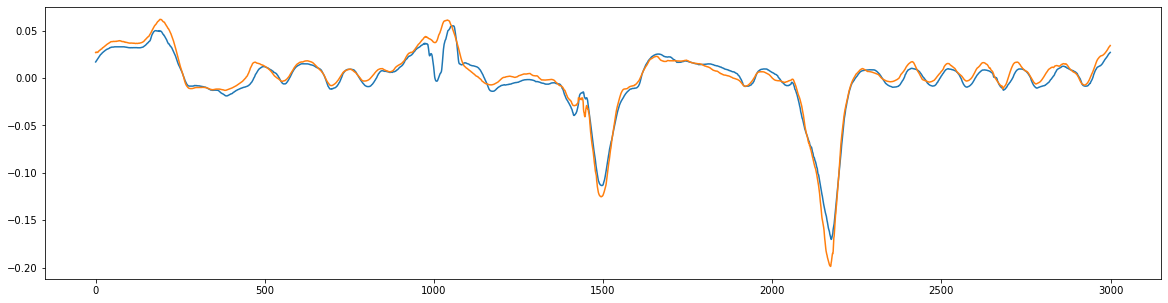

In [90]:
b, e = 0, 3000
plt.figure(figsize=(20,5))
plt.plot(steer_angle[b:e])
plt.plot(np.array(wp_angles[b:e]*-1)) 

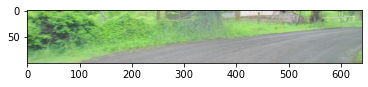

In [91]:
plt.imshow(img[2150])

In [92]:
temporal_error_sqrt = np.sqrt(temporal_error.cpu())
np.quantile(temporal_error_sqrt, .95)

0.05158419273793683

In [93]:
temporal_error_sqrt

tensor([0.0192, 0.0119, 0.0155,  ..., 0.0080, 0.0175, 0.0106])

(array([1.7992e+04, 6.2200e+02, 1.8700e+02, 6.4000e+01, 4.3000e+01,
        3.7000e+01, 1.9000e+01, 1.7000e+01, 8.0000e+00, 4.0000e+00]),
 array([2.5121344e-04, 4.9019799e-02, 9.7788386e-02, 1.4655697e-01,
        1.9532555e-01, 2.4409413e-01, 2.9286271e-01, 3.4163129e-01,
        3.9039990e-01, 4.3916848e-01, 4.8793706e-01], dtype=float32),
 <BarContainer object of 10 artists>)

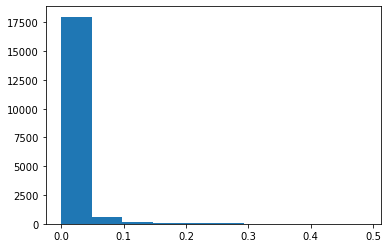

In [94]:
plt.hist(temporal_error_sqrt.numpy()[temporal_error_sqrt.numpy()<.5])

In [95]:
((steer_angle[1:] - steer_angle[:-1])**2).mean()

1.13e-06

In [96]:
pearsonr(steer_angle[b:e], wp_angles[b:e]*-1)

(0.9814212667438104, 0.0)

In [97]:
((steer_angle[b:e] - wp_angles[b:e]*-1)).mean()

-0.0024104043564448755

In [98]:
from scipy.signal import convolve

temporal_error_smoothed = temporal_error_sqrt #convolve(temporal_error_sqrt, np.ones(8), 'same')

In [99]:
make_vid(model_stem, run_id, preds_all, img, 
             cnn_grads, cnn_activations, rnn_grads, rnn_activations, temporal_error_smoothed)

In [100]:
preds_all.shape

(18999, 22)